In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data =pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Handling Missing Data

In [7]:

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Legitimate transactions and fraudlent transactions
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
#Since data is unbalanced we seperate the data for Analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
#Statistical measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
data.groupby('Class').sum()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,2.696392e+10,2347.798633,-1782.898826,3460.374276,-2234.678319,1550.402644,687.686462,2739.815693,-280.75286,1269.912477,...,-183.181143,-351.08547,-6.91205,19.831519,51.72411,-20.392853,-25.410878,-83.922798,-37.228307,25102462.04
1,3.972743e+07,-2347.798633,1782.898826,-3460.374276,2234.678319,-1550.402644,-687.686462,-2739.815693,280.75286,-1269.912477,...,183.181143,351.08547,6.91205,-19.831519,-51.72411,20.392853,25.410878,83.922798,37.228307,60127.97


In [15]:
#Number of fraudlent Transactions
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38187,39287.0,-1.319083,0.599412,2.799756,0.478560,-0.655606,0.300467,0.052950,0.262010,1.071515,...,0.067316,0.620674,-0.473593,0.444148,0.739778,-0.219635,0.098279,0.159953,35.98,0
221602,142629.0,-0.886643,1.184331,1.165630,0.503318,0.344392,0.589902,-0.064595,0.667359,-1.228285,...,0.118757,0.210799,-0.161202,0.188914,-0.377244,2.270461,0.062950,0.098642,6.42,0
28802,35168.0,-1.586975,1.482836,0.698182,-0.812484,-0.221399,0.266437,-0.168079,1.196370,-0.521889,...,-0.023868,-0.018491,0.076349,-0.241722,-0.269775,0.341666,0.192945,0.098755,4.00,0
237224,149148.0,-0.111540,0.880817,-0.267387,-0.620207,1.209372,-0.286154,0.891741,-0.156295,-0.083367,...,-0.215323,-0.432036,0.084286,0.054743,-1.081386,0.110276,0.320194,0.295319,4.48,0
16661,28025.0,-0.278102,0.122781,1.428254,-1.302473,-0.514659,-0.869363,0.210244,-0.069019,-1.751025,...,0.373165,0.877928,-0.182363,0.558556,0.119458,-0.187652,0.031893,0.044870,28.85,0


In [18]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95460.292683,-0.016650,0.036210,-0.055600,-0.038049,0.022489,-0.081003,0.137018,-0.128302,-0.024485,...,0.049714,0.052165,-0.018380,0.023556,0.044742,0.051524,0.045564,0.010343,-0.001044,103.242033
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [36]:
import seaborn as sns


<Axes: xlabel='Class', ylabel='count'>

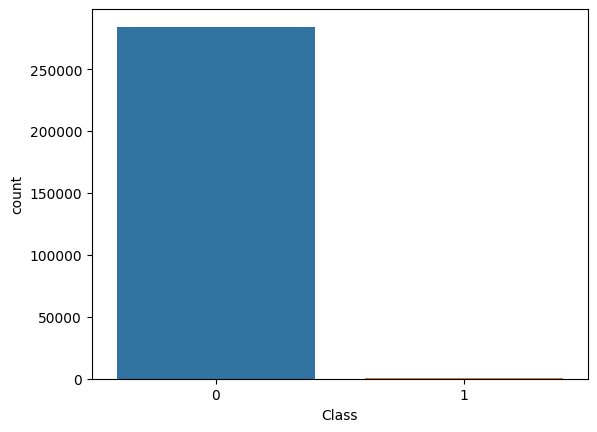

In [38]:
sns.countplot(x='Class', data=data)

<Axes: >

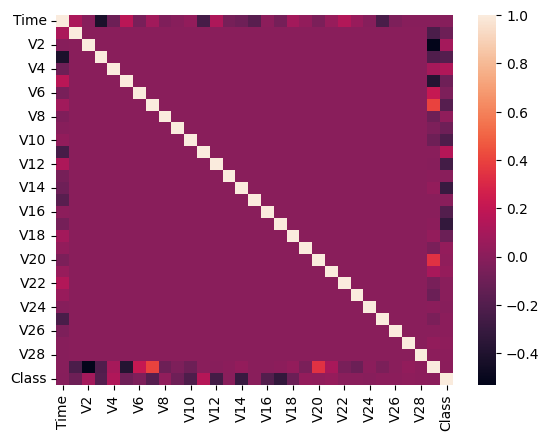

In [40]:
corr = data.corr()
sns.heatmap(corr)

Splitting data into Features & Targets

In [21]:

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

            Time        V1        V2        V3        V4        V5        V6   
38187    39287.0 -1.319083  0.599412  2.799756  0.478560 -0.655606  0.300467  \
221602  142629.0 -0.886643  1.184331  1.165630  0.503318  0.344392  0.589902   
28802    35168.0 -1.586975  1.482836  0.698182 -0.812484 -0.221399  0.266437   
237224  149148.0 -0.111540  0.880817 -0.267387 -0.620207  1.209372 -0.286154   
16661    28025.0 -0.278102  0.122781  1.428254 -1.302473 -0.514659 -0.869363   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [23]:
print(Y)

38187     0
221602    0
28802     0
237224    0
16661     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


MODEL TRAINING

Logistic Regression

In [26]:
model = LogisticRegression()

In [27]:
#Training the model with Training Data
model.fit(X_train, Y_train)


C:\Users\mdasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

ACCURACY SCORE

In [28]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9491740787801779


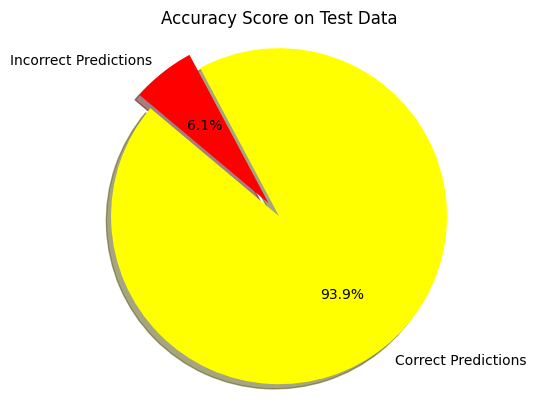

In [30]:
test_data_accuracy =   0.9390088945362135

# Create a pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [test_data_accuracy, 1 - test_data_accuracy]
colors = ['yellow', 'red']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Accuracy Score on Test Data')
plt.show()

In [31]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


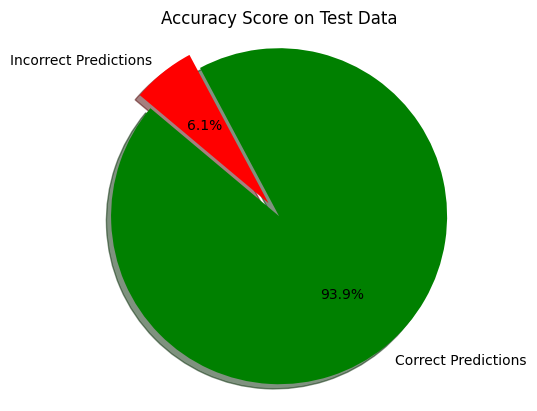

In [33]:
test_data_accuracy =   0.9390862944162437

# Create a pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [test_data_accuracy, 1 - test_data_accuracy]
colors = ['green', 'red']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Accuracy Score on Test Data')
plt.show()

Normalizing Data

In [80]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

In [81]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [83]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [84]:
from imblearn.over_sampling import SMOTE

In [85]:

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy = 1.0, random_state = 24)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [86]:

# UnderSampling using Random Undersampling
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, Y_train)

In [87]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, Y_train_smote)

LogisticRegression()

In [88]:
model_rus = LogisticRegression()
model_rus.fit(X_train_rus , y_train_rus)

LogisticRegression()

Evaluate Models

In [89]:
y_pred_smote = model_smote.predict(X_test)
y_pred_rus = model_rus.predict(X_test)

In [93]:
print("Results using Smote: ")
print(classification_report(Y_test, y_pred_smote))

Results using Smote: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [94]:
print("Results using Random unsampling: ")
print(classification_report(Y_test, y_pred_smote))

Results using Random unsampling: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



Model Evaluation

In [97]:
# Accuracy on training Data
X_train_pred = model_smote.predict(X_train)
train_acc = accuracy_score(X_train_pred,Y_train)
train_acc

0.940279542566709

In [98]:
# Accuracy on testing Data
X_train_pred = model_smote.predict(X_test)
train_acc = accuracy_score(X_train_pred,Y_test)
train_acc

0.934010152284264

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
#Random Forest Classifier
rf_model = RandomForestClassifier()

In [104]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [105]:
rf_ypred = rf_model.predict(X_test)


In [107]:
acc1 = accuracy_score(Y_test,rf_ypred)
print("Accuracy is:",acc1)

Accuracy is: 0.9289340101522843


In [109]:
print(classification_report(Y_test, rf_ypred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [110]:
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score

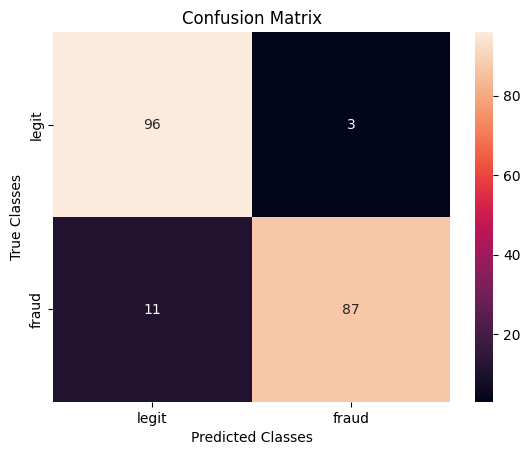

In [113]:
LABELS = ['legit', 'fraud']
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d");

plt.title("Confusion Matrix")
plt.ylabel("True Classes")
plt.xlabel("Predicted Classes")
plt.show()

Precision Score

In [116]:
prec = precision_score(Y_test, X_test_prediction)
print("Precison is {}".format(prec))

Precison is 0.9666666666666667


Recall Score

In [117]:
rec = recall_score(Y_test, X_test_prediction)
print("Recall score is:{}".format(rec))

Recall score is:0.8877551020408163


F1 Score

In [118]:
f1 = f1_score(Y_test, X_test_prediction)
print("f1 score is{}".format(f1))

f1 score is0.9255319148936171
